In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from diagram_utils import *
import dagology as dag

In [2]:
%matplotlib inline

In [18]:
N = 30
D = 2
R = dag.minkowski_interval(N, D)
R = np.random.random((N, D))
G_ = dag.causal_set_graph(R)
G = transitive_reduction(G_)
nx.set_node_attributes(G, 'position', nx.get_node_attributes(G_, 'position'))
LP = nx.dag_longest_path(G)

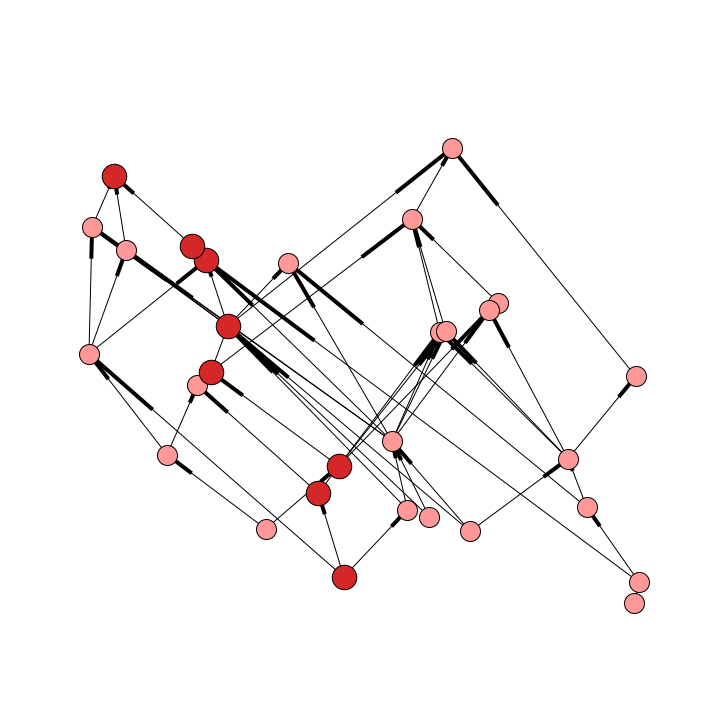

In [20]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
chain_1 = LP
pos = {i:G.node[i]['position'][::-1] for i in G.nodes()}
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if x not in chain_1], 
                       node_size=400, node_color=tableau20[7])
nx.draw_networkx_nodes(G, pos, nodelist=chain_1, 
                       node_size=600, node_color=tableau20[6])
nx.draw_networkx_edges(G, pos, nodelist=G.nodes())
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
labels = {i:i for i in G.nodes()}
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
figure_path = './figures/LP'
plt.tight_layout()
for ending in ['.eps', '.pdf', '.png']:
    plt.savefig(figure_path + ending)
plt.show()